In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler


In [ ]:
data = pd.read_csv('train.csv')




In [ ]:

input_dim = data.shape[1]


input_layer = Input(shape=(input_dim,))
encoded = Dense(512, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)

decoded = Dense(512, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  


autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 12864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       6,586,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12864)               │       6,599,232 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,317,824 (50.80 MB)

 Trainable params: 13,317,824 (50.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

autoencoder.fit(data, data, epochs=50, batch_size=32, shuffle=True)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.4261
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4098
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3904
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3995
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3653
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3708
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3622
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3575
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3589
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3700
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3598
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3569
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3511
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3481
Epoch 15/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3466
Epoch 16/50
98/98 

In [ ]:

first_series= pd.read_csv('train.csv').iloc[0].values




In [ ]:
first_series

array([0.102, 0.058, 0.05 , ...,   nan,   nan,   nan])

In [ ]:
test_predicted = autoencoder.predict(test_scaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


In [ ]:
print("Nombre de NaN dans test_predicted:", np.isnan(test_predicted).sum())
print("Valeurs max/min:", np.nanmax(test_predicted), np.nanmin(test_predicted))


Nombre de NaN dans test_predicted: 12864
Valeurs max/min: nan nan


<ipython-input-33-55fb336b58d9>:2: RuntimeWarning: All-NaN slice encountered
  print("Valeurs max/min:", np.nanmax(test_predicted), np.nanmin(test_predicted))


In [ ]:
from keras.layers import Input, Dense, Dropout, BatchNormalization, Add
from keras.models import Model
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


train_data = np.array(data)  
test_series = np.array(first_series)


input_dim = train_data.shape[1] 
encoded = Dense(256, activation="relu")(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dropout(0.2)(encoded)

encoded = Dense(64, activation="relu")(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dropout(0.2)(encoded)

encoded = Dense(64, activation="relu")(encoded)


bottleneck = Dense(16, activation="relu")(encoded)


decoded = Dense(32, activation="relu")(bottleneck)
decoded = BatchNormalization()(decoded)

decoded = Dense(64, activation="relu")(decoded)
decoded = BatchNormalization()(decoded)

decoded = Dense(128, activation="relu")(decoded)


encoded_for_skip = Dense(128, activation="relu")(encoded)  


skip_connection = Add()([decoded, encoded_for_skip])  


output_layer = Dense(input_dim, activation="linear")(skip_connection)


autoencoder = Model(input_layer, output_layer)

# Compile the model
autoencoder.compile(optimizer="adam", loss="mse")


autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, shuffle=True, verbose=1)





<Axes: >

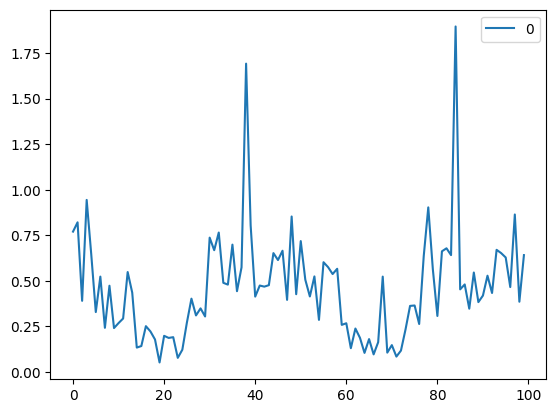

In [ ]:
pd.DataFrame(test_imputed[:100]).plot()

In [ ]:
test_filled = first_series.copy()


missing_indices = np.where(np.isnan(test_filled))[0]


test_filled[missing_indices] = 0


test_filled = test_filled.reshape(1, -1)


test_predicted = autoencoder.predict(test_filled)[0] 


test_imputed = test_series.copy()
test_imputed[missing_indices] = test_predicted[missing_indices]


comparison = pd.DataFrame({
    "Valeur Réelle": test_series[missing_indices],  
    "Valeur Prédite": test_imputed[missing_indices]
})

print(comparison)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
Empty DataFrame
Columns: [Valeur Réelle, Valeur Prédite]
Index: []


In [ ]:
def inject_nan_to_list(data, nan_ratio=0.3, seed=44):
    """Injecte des NaN aléatoirement dans une liste."""
    np.random.seed(seed)
    data_copy = data.copy()  
    num_nan = max(1, int(len(data) * nan_ratio))  
    nan_indices = np.random.choice(len(data), num_nan, replace=False) 

    for idx in nan_indices:
        data_copy[idx] = np.nan 

    return data_copy

In [ ]:
test_filled = inject_nan_to_list(first_series.copy())

In [ ]:
missing_indices = np.where(np.isnan(test_filled))[0]


test_filled[missing_indices] = 0


test_filled = test_filled.reshape(1, -1)


test_predicted = autoencoder.predict(test_filled)[0]  


test_imputed = test_series.copy()
test_imputed[missing_indices] = test_predicted[missing_indices]


comparison = pd.DataFrame({
    "Valeur Réelle": test_series[missing_indices],  
    "Valeur Prédite": test_imputed[missing_indices]
})

print(comparison)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
      Valeur Réelle  Valeur Prédite
0             0.810        0.474130
1             0.526        0.361611
2             0.531        0.299553
3             0.317        0.221973
4             0.265        0.196501
...             ...             ...
3854          1.996        0.280930
3855          0.933        0.434343
3856          0.383        0.469790
3857          0.233        0.522981
3858          0.320        0.457941

[3859 rows x 2 columns]
